# Basic Image Manipulation

In this notebook we will cover how to perform image transformations including:

* Accessing and manipulating images pixels
* Image resizing
* Cropping
* Flipping

In [4]:
! activate opencv-env

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

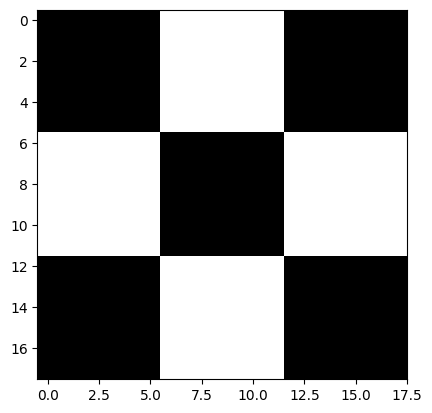

In [2]:
cb_image = cv.imread('./nb2/checkerboard_18x18.png', cv.IMREAD_GRAYSCALE)

plt.imshow(cb_image, cmap="gray")
print(cb_image)

### Accessing Individual Pixels

Numpy, matrix[r, c]

In [4]:
print(f"[0,6] {cb_image[0,6]}")
print(f"[0,5]: {cb_image[0,5]}")

[0,6] 255
[0,5]: 0


### Modifying Image Pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

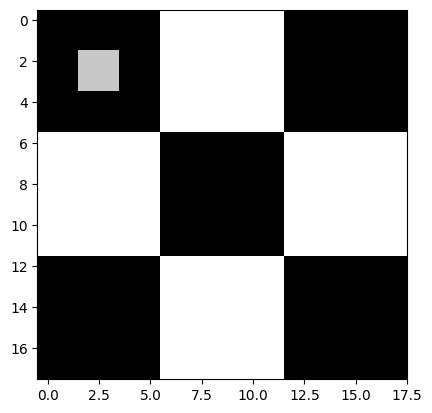

In [5]:
cb_image_copy = cb_image.copy()
cb_image_copy[2,2] = 200
cb_image_copy[2,3] = 200
cb_image_copy[3,2] = 200
cb_image_copy[3,3] = 200

plt.imshow(cb_image_copy, cmap="gray")
print(cb_image_copy)

Cropping Images

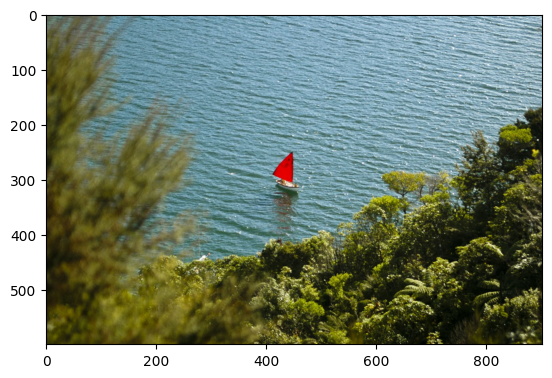

In [7]:
img_ng_bgr = cv.imread('./nb2/New_Zealand_Boat.jpg', cv.IMREAD_COLOR)
img_ng_rgb = img_ng_bgr[:,:,::-1]
plt.imshow(img_ng_rgb)

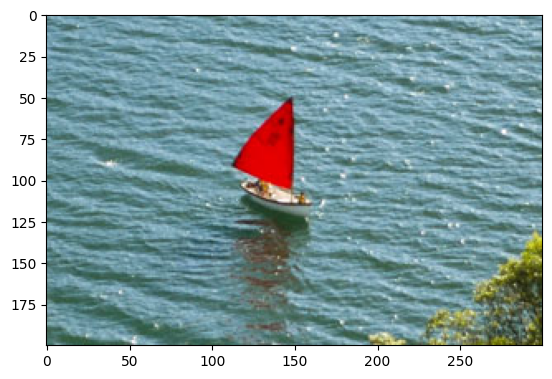

In [8]:
cropped_region = img_ng_rgb[200:400, 300:600]
plt.imshow(cropped_region)

### Resizing Images
`
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
`

dst: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

src: input image

dsize: output image size

Optional arguments that are often used include:

fx: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

fy: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src

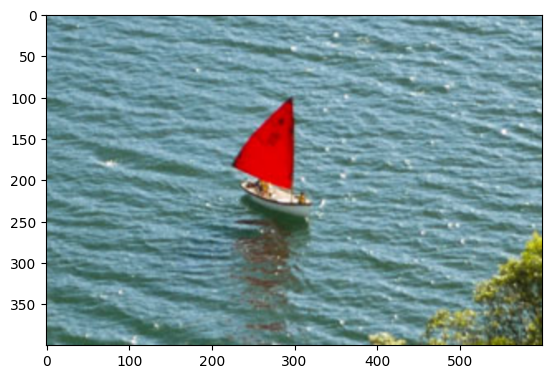

In [9]:
resized_cropping_region_2x = cv.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropping_region_2x)

### Resize with aspect ratio

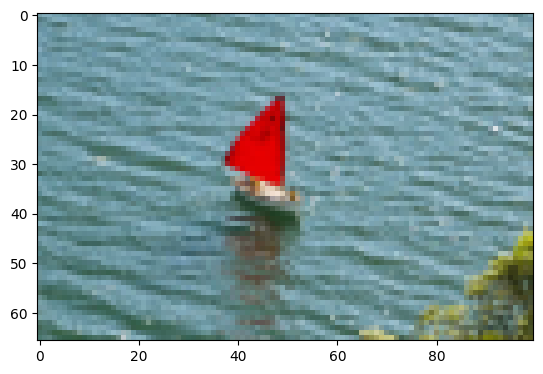

In [11]:
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

resized_cropping_region_aspect = cv.resize(cropped_region, dsize=dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_cropping_region_aspect)

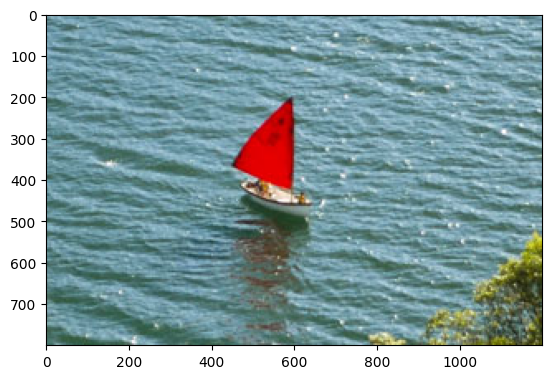

In [15]:
desired_width = 1200
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

resized_cropping_region_aspect = cv.resize(cropped_region, dsize=dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_cropping_region_aspect)

### Flipping Images

`
dst = cv.flip( src, flipCode )
`
flipCode = how to flip the array; 0 - x-axis, positive_value for example 1 = y-axis, negative value -1 = both axis

Text(0.5, 1.0, 'Original')

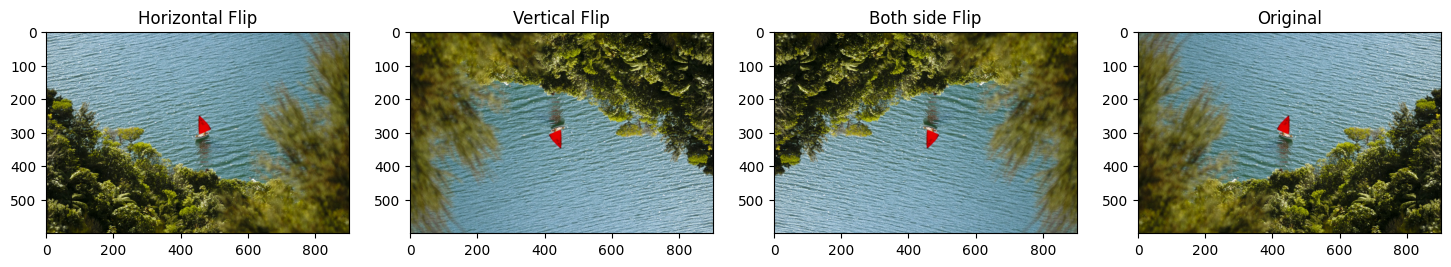

In [14]:
img_ng_rgb_flip_h = cv.flip(img_ng_rgb, 15) # no diff whether it is 15 or 1
img_ng_rgb_flip_v = cv.flip(img_ng_rgb, 0)
img_ng_rgb_flip_both = cv.flip(img_ng_rgb, -10)

plt.figure(figsize=(18,5))
plt.subplot(141);plt.imshow(img_ng_rgb_flip_h);plt.title('Horizontal Flip')
plt.subplot(142);plt.imshow(img_ng_rgb_flip_v);plt.title('Vertical Flip')
plt.subplot(143);plt.imshow(img_ng_rgb_flip_both);plt.title('Both side Flip')
plt.subplot(144);plt.imshow(img_ng_rgb);plt.title('Original')